### Identify the center of mass of a flock of particels

When a group of particles, or trajectories, join together is space, they can be considered a ''flock''. Such clusters have specific diagnostics and spatial temporal statistics, of which some are shown below. The center of mass of this flock gives a hint about XXXX.

### 0. Import of libraries

General libraries are imported, but also the specific functions which are situated in this folder

In [1]:
import os
import time

import numpy as np
import netCDF4 as nc

import cartopy
import matplotlib.pyplot as plt
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER

from Functions.flock_measures import center_of_mass_displacement

print(time.ctime(time.time()))

Thu Jun 15 15:52:01 2023


### 1. Load the data
load the toy data:

In [2]:
fn = 'toy_data_01.nc'
ds = nc.Dataset(os.path.join(os.pardir, 'Simulations', fn))

lat, lon = ds['lat'][:], ds['lon'][:]
tim, id = ds['time'][:], ds['trajectory'][:]

# make a selection so a relatively coherent flock is present
lat, lon, tim = lat[100:,:40], lon[100:,:40], tim[100:,:40]

### 2. Calculate the center of mass displacement of a flock

It can be calculated in the following way:

In [3]:
a,b = center_of_mass_displacement(lon.data, lat.data)
a += np.mean(lon.data[:,0])
b += np.mean(lat.data[:,0])

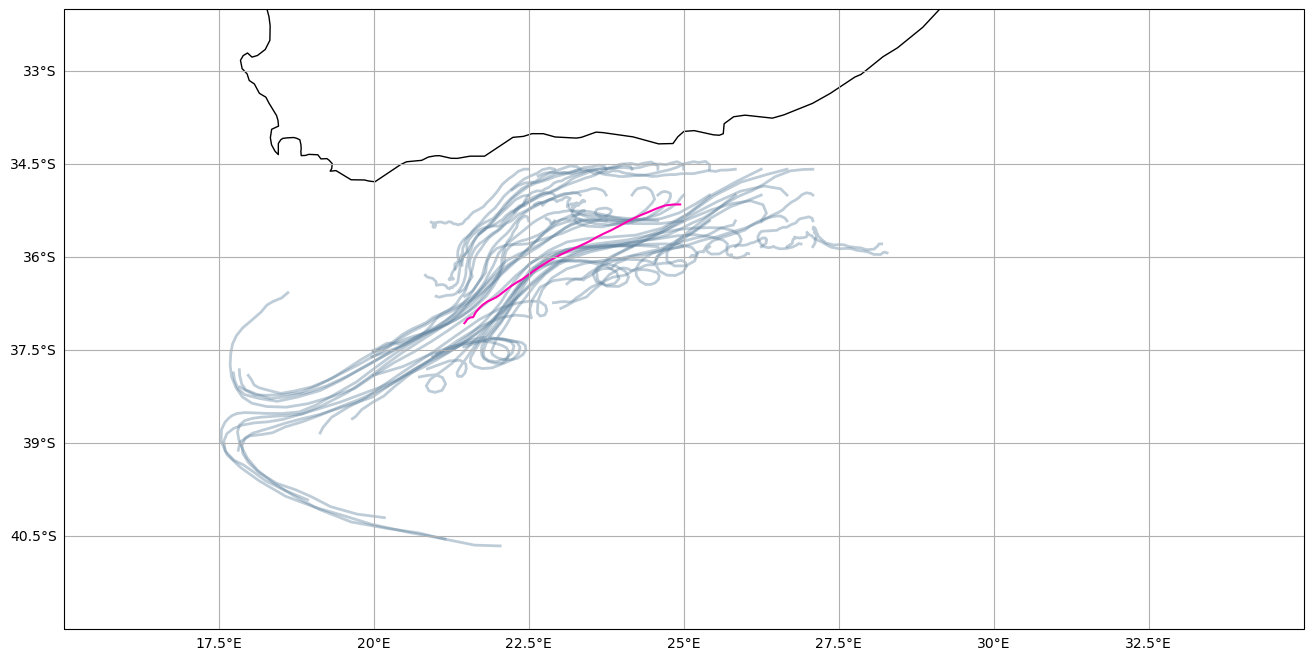

In [5]:
fig = plt.figure(figsize=(16,17)) #(17,5)
ax1 = plt.subplot(111, projection=cartopy.crs.PlateCarree())
    
ax1.coastlines(resolution='50m')
ax1.plot(lon.data.T, lat.data.T, transform=cartopy.crs.PlateCarree(), 
         color='xkcd:greyish blue', alpha=0.4, linewidth=2)
ax1.plot(a, b, 
         transform=cartopy.crs.PlateCarree(), color='xkcd:bright pink')
ax1.set_xlim([15, 35])
ax1.set_ylim([-42, -32])
gl = ax1.gridlines(crs=cartopy.crs.PlateCarree(), draw_labels=True)
gl.top_labels = False
gl.right_labels = False
gl.xformatter = LONGITUDE_FORMATTER
gl.yformatter = LATITUDE_FORMATTER

plt.show()